# Gaussian Naive Bayes Classifier

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import statistics
import scipy.stats as stats
from sklearn.datasets import make_classification

In [11]:
def plot_dataset(X: np.ndarray, y: np.ndarray):
    if X.shape[-1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap="viridis", edgecolor="k", marker="o", label="Data points")
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_zlabel("X3")

        plt.show()
    if X.shape[-1] == 2:
        fig = plt.figure()
        ax = fig.add_subplot(111)#, projection="3d")
        ax.scatter(X[:,0], X[:,1], c=y, cmap="viridis", edgecolor="k", marker="o", label="Data points")
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_title(f"Dataset")

        plt.show()

def plot_dataset_and_predictions(X: np.ndarray, y: np.ndarray, X_hat: np.ndarray, y_hat: np.ndarray, acc: float):
    if X.shape[-1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap="viridis", edgecolor="k", marker="o", label="Data points", alpha=0.4)
        ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], color="red", edgecolor="k", marker="s", label="Predictions", s=25)
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_zlabel("X3")
        ax.set_title(f"Dataset and predictions | acc: {acc}")
        plt.show()
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], c=y_hat, cmap="magma", edgecolor="k", marker="s", label="Predictions")
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_zlabel("X3")
        ax.set_title(f"Predictions | acc: {acc}")
        plt.show()
        
    if X.shape[-1] == 2:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(X[:,0], X[:,1], c=y, cmap="magma", edgecolor="k", marker="o", label="Data points", alpha=0.4)
        ax.scatter(X_hat[:,0], X_hat[:,1], color="red", marker='s', edgecolor="k", label="Predictions", s=25)
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_title(f"Dataset and predictions | acc: {acc}")
        plt.show()        
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(X_hat[:,0], X_hat[:,1], c=y_hat, cmap="magma", marker='s', edgecolor="k", label="Predictions")
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_title(f"Predictions | acc: {acc}")
        plt.show()
        
def gaussian(X: np.ndarray, mean: np.ndarray, std: np.ndarray) -> np.ndarray:
    return 1/(std*np.sqrt(2*np.pi))*np.exp(-(X-mean)**2/(2*std**2))    

## Classifier implementation

In [12]:
class GaussianNaiveBayes():
    def __init__(self) -> None:
        self.priors = None
        self.priors_log = None
        self.means = None
        self.stddevs = None
        self.classes = None
        self.all_class_samples = None
        self.all_feature_samples = None
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.classes = np.unique(y)
        
        
        self.all_class_samples = [[x for i,x in enumerate(X) if y[i]==cls] for cls in self.classes]
        self.all_feature_samples = [[[self.all_class_samples[i][j][k] for j in range(len(self.all_class_samples[i])) 
                                     for k in range(len(self.all_class_samples[i][j]))]] for i in range(len(self.all_class_samples))]
        # self.priors = [np.sum([1/len(y) for i,x in enumerate(X) if y[i] == cls]) for cls in self.classes]
        self.priors = [len(class_samples)/len(y) for class_samples in self.all_class_samples]
        self.priors_log = [np.log(prior) for prior in self.priors]
        self.priors_log = np.reshape(self.priors_log,(-1,1))
        
        self.means = [np.mean(class_samples, axis=0) for class_samples in self.all_class_samples]
        self.stddevs = np.sqrt([np.var(class_samples, axis=0) for class_samples in self.all_class_samples])
      
    def predict(self, X: np.ndarray):
        preds = [self.gaussian(X, self.means[i], self.stddevs[i]) for i,cls in enumerate(self.classes)]
        logits = [np.log(pred) for pred in preds]
        
        logits_sums = np.sum(logits,axis=2)
        
        logits_sums_with_priors = logits_sums + self.priors_log
        
        bayes_probs_with_priors_resorted = [[logits_sums_with_priors[cls][i] for cls in self.classes] for i,_ in enumerate(X)]
        
        y_hat = np.argmax(bayes_probs_with_priors_resorted, axis=1)
        
        return (y_hat, bayes_probs_with_priors_resorted)
        
    def gaussian(self, X: np.ndarray, class_means: np.ndarray, class_stddevs: np.ndarray) -> np.ndarray:
        # return 1/(class_stddevs*np.sqrt(2*np.pi))*np.exp(-(X-class_means)**2/(2*class_stddevs**2))


        return stats.norm.pdf(X, class_means, class_stddevs)

## Define parameters

In [13]:
num_train_samples = 1000
num_test_samples = 10
num_features = 3
num_classes = 3
random_state_train = 55
random_state_test = 1212

X_train,y_train = make_classification(n_samples=num_train_samples, n_features=num_features, n_redundant=0, n_clusters_per_class=1, random_state=random_state_train, n_classes=num_classes)
X_test,y_test = make_classification(n_samples=num_test_samples, n_features=num_features, n_redundant=0, n_clusters_per_class=1, random_state=random_state_test, n_classes=num_classes)

list(zip(X_train, y_train))

[(array([ 0.94312601,  0.07842825, -0.22770585]), 1),
 (array([-0.74591521, -0.12958951, -0.77631139]), 0),
 (array([-0.78326227,  0.3825542 , -2.06735778]), 2),
 (array([-1.29038554, -0.51517476, -0.77039381]), 0),
 (array([ 0.75641226,  1.61455454, -1.36055433]), 2),
 (array([-0.82323952, -0.59602169, -2.20458916]), 0),
 (array([-0.28167697, -1.47561158,  0.39849506]), 1),
 (array([ 1.46997141, -2.07697628,  1.43948075]), 1),
 (array([ 1.27267633, -0.58945607,  2.23491861]), 1),
 (array([-1.35635393, -0.5794575 , -1.64540435]), 0),
 (array([-1.17415952, -0.67624651, -1.65465551]), 0),
 (array([-0.74386352, -0.19217879, -0.73150869]), 0),
 (array([ 0.21174301, -0.15397505, -1.54509904]), 2),
 (array([-1.2298914 ,  2.16020933, -0.77415064]), 0),
 (array([1.77444641, 1.51776793, 1.27416907]), 1),
 (array([ 1.75978267, -0.06613088, -0.64641928]), 1),
 (array([0.6326369 , 0.02535966, 0.39399508]), 1),
 (array([-1.06915374,  2.51826862, -1.32960688]), 0),
 (array([ 1.55002191,  2.00700907,

## Fit classifier

In [14]:
gn = GaussianNaiveBayes()

gn.fit(X_train,y_train)

## Feature visualizations
### Feature distributions by class

[array([-0.98042035, -0.07576858, -0.99932868]), array([1.0007043 , 0.054316  , 0.95798716]), array([ 0.94797309,  0.03207038, -1.03421474])]


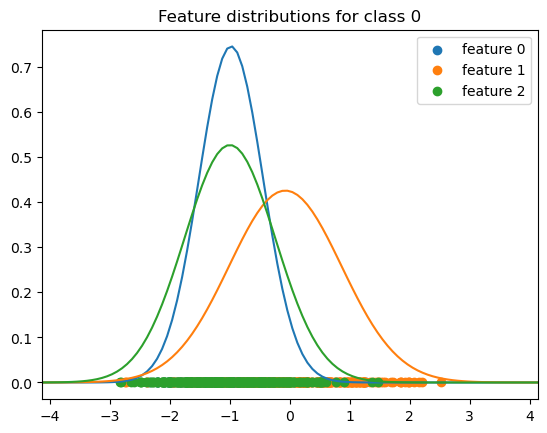

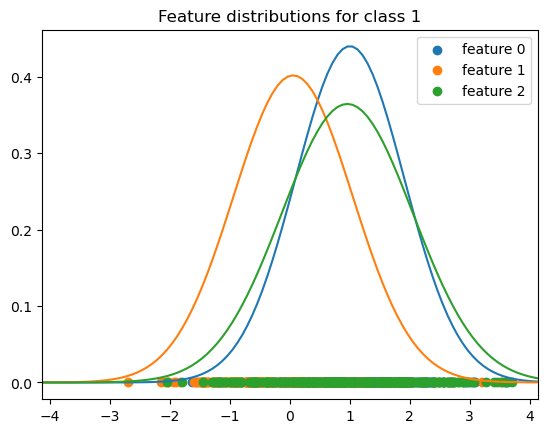

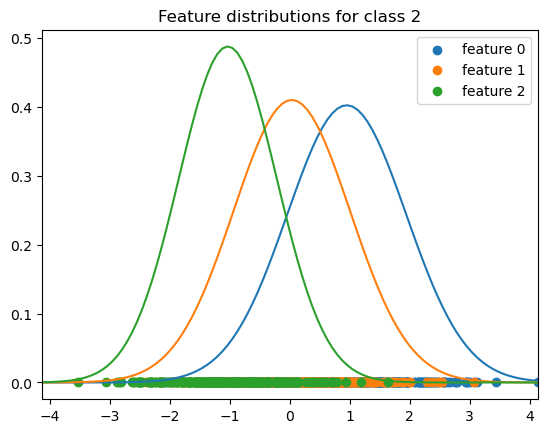

In [15]:
print(gn.means)

means = np.array(gn.means)
stddevs = np.array(gn.stddevs)
categories = np.unique(y_train)


xlims = np.abs(np.min(X_train, axis=0))
xlim = np.max(np.max(np.abs(X_train), axis=0))
xrange = np.linspace(-xlim,xlim,100)

for i,(means,stddevs) in enumerate(zip(means,stddevs)):
    plt.figure()
    for j,(mean,stddev) in enumerate(zip(means,stddevs)):
        plt.plot(xrange, gn.gaussian(xrange,mean,stddev))
        class_xcoords = np.array(gn.all_class_samples[i])[:,j]
    
        plt.scatter(class_xcoords, np.zeros_like(class_xcoords), label=f"feature {j}")
    
    plt.title(f"Feature distributions for class {i}")
    plt.legend()
    plt.xlim((-xlim,xlim))
    plt.show()

## Prediction

In [16]:
y_hat, bpr = gn.predict(X_test)

num_correct = np.sum([int(val) for val in (y_test == y_hat)])
acc = num_correct/len(y_hat)

print(f"acc: {acc}")

acc: 0.7


## Result visualization

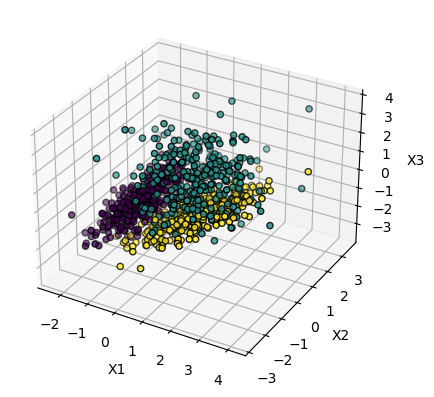

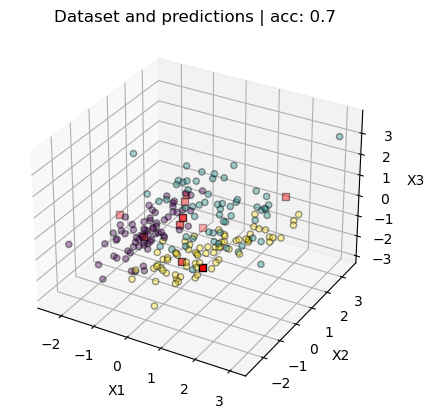

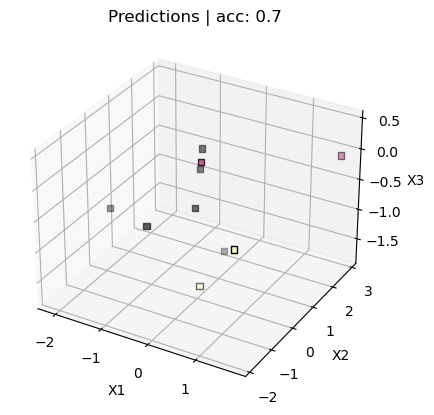

In [17]:
plot_dataset(X_train,y_train)
plot_dataset_and_predictions(X_train[::5],y_train[::5],X_test,y_hat,acc)